In [88]:
# Bibliotecas

# Labels para Modelagem e Matrizes

import pandas as pd
import numpy as np

# Labels para análise Gráficas

import matplotlib.pyplot as plt
import seaborn as sns

# Desativando avisos

import warnings
warnings.filterwarnings('ignore')

In [89]:
# Lendo bade de dados
Base_Dados = pd.read_csv('/content/Dados_Indendio.csv', encoding='latin-1')

# Verificando
Base_Dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [90]:
#  Valores nulos

Base_Dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

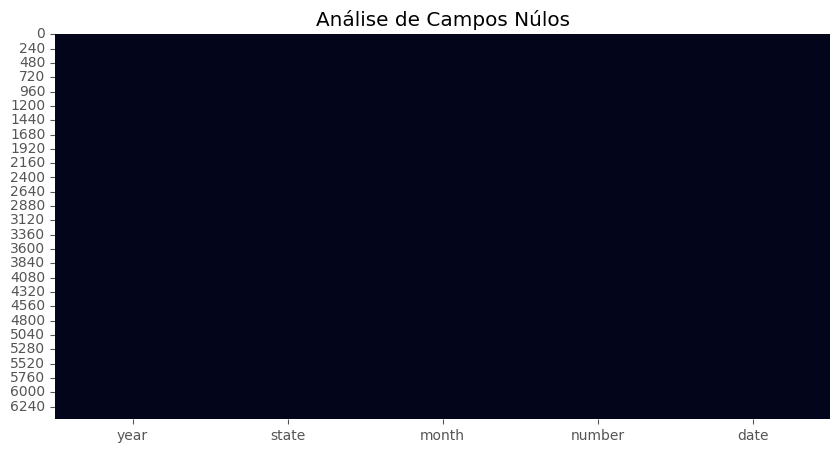

In [91]:
# Plot nulos

plt.figure(figsize=(10, 5))
plt.title('Análise de Campos Núlos')
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [92]:
# Estatística

Base_Dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [93]:
# Info

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [94]:
# Campos Únicos

Base_Dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

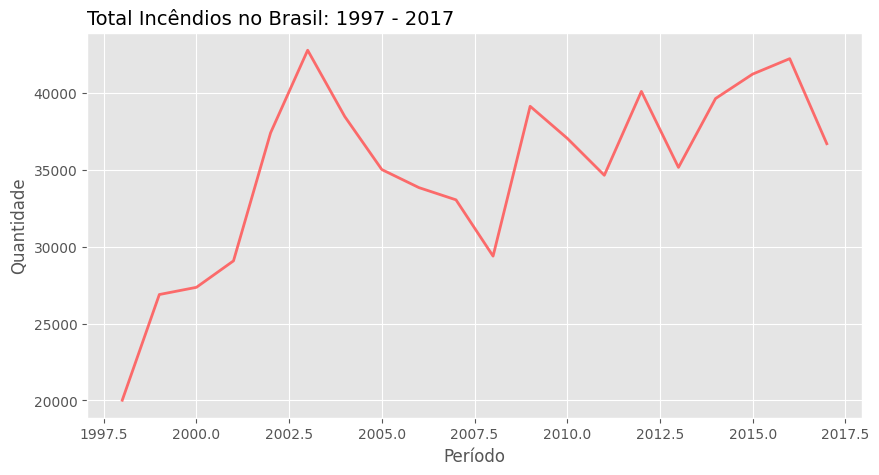

In [95]:
# Análise por ano dos Incêndio

Analise = Base_Dados.groupby(by= ['year']).sum().reset_index()

# Gráfico

# Estilo

plt.style.use('ggplot')

# Tamnaho
plt.figure(figsize=(10, 5))

# Plot
plt.title('Total Incêndios no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data= Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

# Label

plt.ylabel('Quantidade')
plt.xlabel('Período');


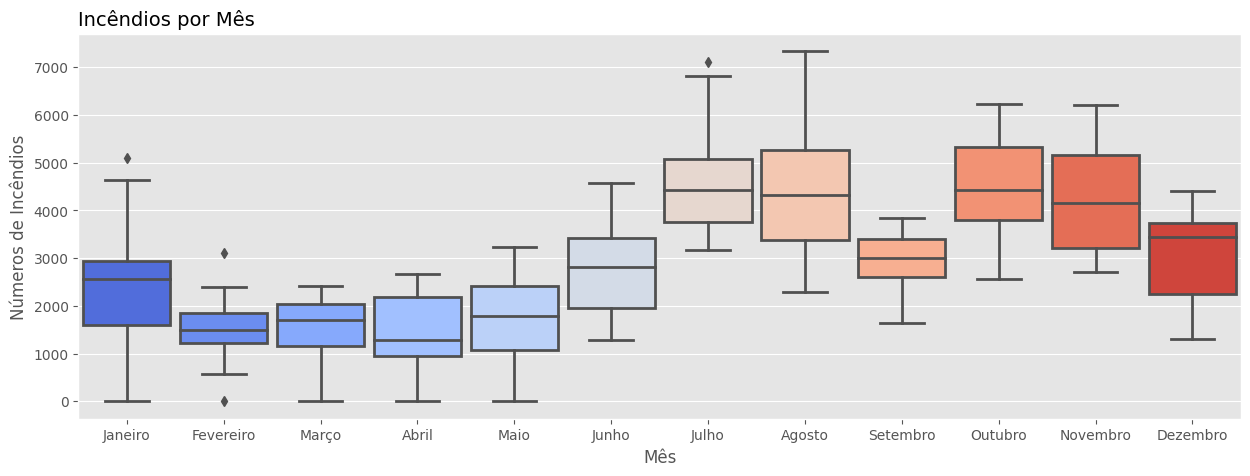

In [96]:
# Análise por ano e mês dos Incêndio
Analise_02 = Base_Dados.groupby(by= ['year', 'month']).sum().reset_index()

Analise_02.head()


# Gráfico

# Tamnaho
plt.figure(figsize=(15, 5))

# Plot
plt.title('Incêndios por Mês', loc='left', fontsize=14)
sns.boxplot(data= Analise_02, x='month', y='number', palette= 'coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Label

plt.xlabel('Mês')
plt.ylabel('Números de Incêndios');

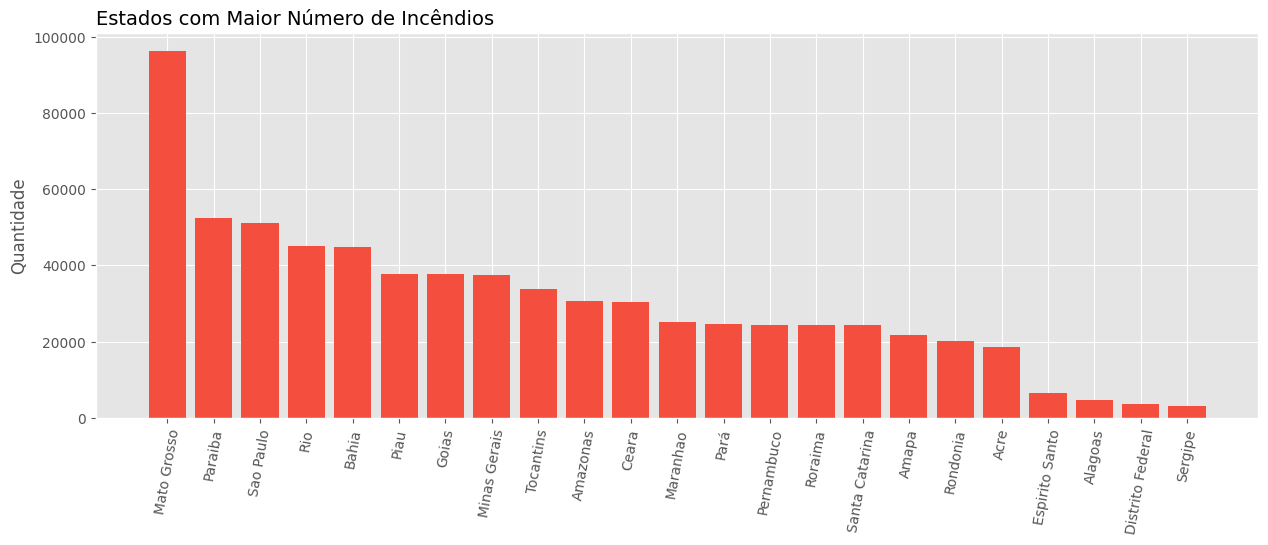

In [97]:
# Análise dos Incêndios por Estado
Analise_03 = Base_Dados.groupby(by= ['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)

Analise_03.head()

# Tamnaho
plt.figure(figsize=(15, 5))
plt.title('Estados com Maior Número de Incêndios', loc='left', fontsize=14)

# Gráfico

plt.bar(Analise_03['state'], Analise_03["number"] , color='#f44e3f')

# Label


plt.ylabel('Quantidade')
plt.xticks(rotation=80);

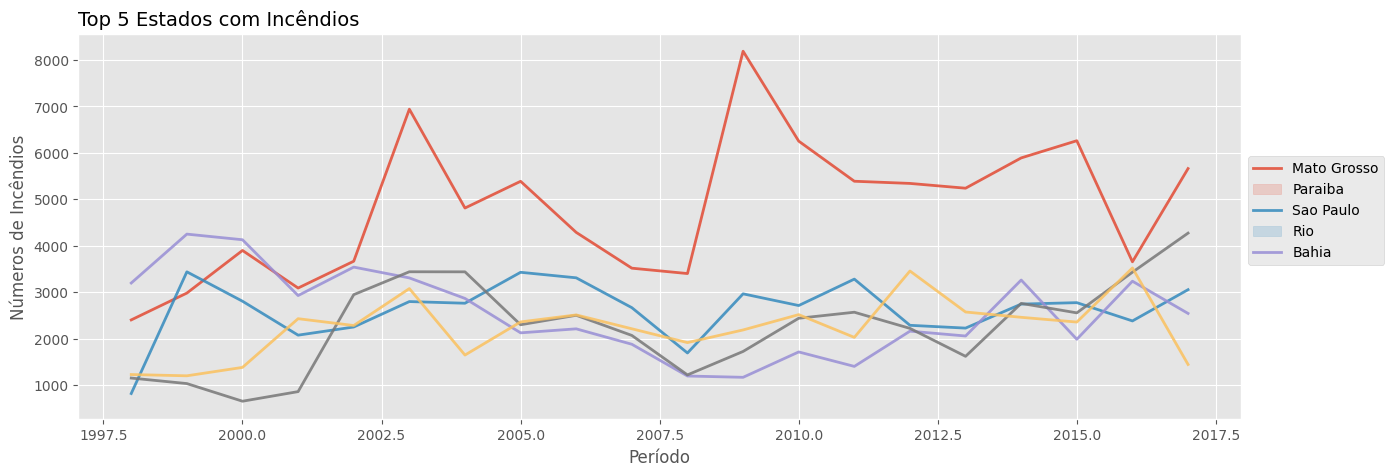

In [98]:
# Estados Top 10
Lista_Top5 = Analise_03['state'][0:5].values

# Tamanho
plt.figure(figsize=(15, 5))

# Título
plt.title('Top 5 Estados com Incêndios', loc='left', fontsize=14)

# Loop
for Coluna in Lista_Top5:

  # Filtrar o Estado
  Filtro = Base_Dados.loc[Base_Dados['state'] == Coluna]

  # Agrupar os valores para sumarizar
  Analise_Local = Filtro.groupby(by= ['year']).sum().reset_index()

  # Plot
  sns.lineplot(data= Analise_Local, x='year', y='number', lw=2, alpha=0.85 )


# Label

plt.xlabel('Período')
plt.ylabel('Números de Incêndios');

# Legenda
plt.legend(Lista_Top5, bbox_to_anchor=(1, 0.7));

In [122]:
# Plot Geográfico

# Colocando os estados em ordem alfabética
Estados = Analise_03.sort_values('state')['state'].values

# Gerando os valores
Valores = Analise_03.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizar os Dados
Dicionario={
    'Estados': Estados,
    'Latitude': Lat,
    'Longitude': Log,
    'Incêndios': Valores
}

# Lendo o Dicionário
Analise_Geografica = pd.DataFrame (Dicionario)

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [123]:
# Fazendo o plot
import plotly.express as px

# Mapa de Calor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)